# Deep Learning
## Building a model that can recognize cats using Artificial Neural Networks.

In [ ]:
import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets

In [2]:
# data
path = untar_data(URLs.PETS)/'images'

# Labeling function
def is_cat(x): return x[0].isupper()

# Dataloaders
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 163MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.171535,0.025591,0.992558,00:47


epoch,train_loss,valid_loss,accuracy,time
0,0.079142,0.021820,0.994587,00:48
1,0.033651,0.009410,0.996617,00:51


In [3]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is it a cat??: True
Probability of accuracy: 1.000


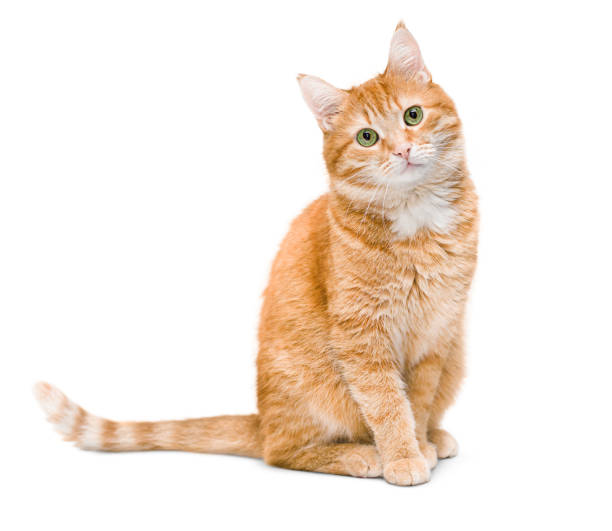

In [5]:
img = PILImage.create(upload.data[-1]) # picture
pred, _, prob = learn.predict(img) # predict
print(f'Is it a cat??: {pred}')
print(f'Probability of accuracy: {prob[1].item():.3f}')
img